# DECTECTOR DE TOPO E FUNDO DUPLO COM REDE NEURAL CONVOLUCIONAL

Artigo de Referência: https://doi.org/10.33793/acperpro.03.01.89


#### CARACTÉRISTICAS DA CNN:
* Conjunto de dados: 
  * 1542 fundo-duplo + 1697 topo-duplo = 3242 imgs
  * 100 de altura por 30 de largura com cmpa cinza
  * Dados convertido em vetor pela biblioteca cv2   
* Arquitetura:
  * 3 camadas: 16-32-64 
  * batch_size = 64
  * dropouts adicionado entre as camadas
  * função de ativação de unidade linear (ReLu)


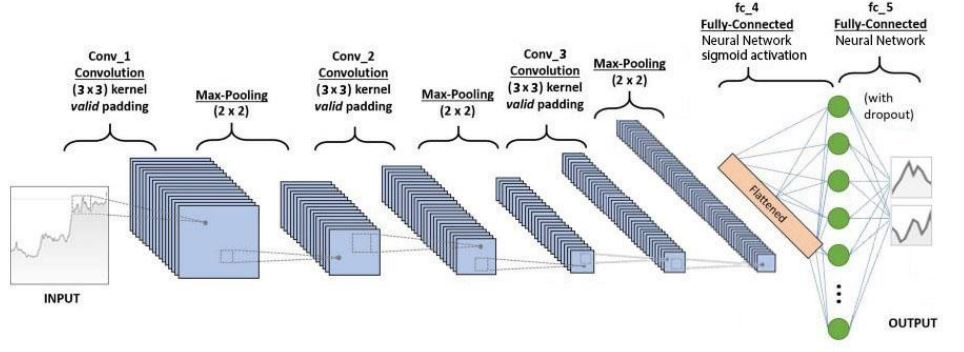

In [1]:
from IPython.display import Image
Image(filename='Arquitetura_CNN.JPG')

## Criando a CNN com Tensorflow

Referência: https://github.com/tarolive/ai-notebooks/blob/main/cats_and_dogs.ipynb

In [1]:
import os 
import matplotlib.pyplot as plt
import tensorflow as tf

### Carregandos as imagens de treino e texto

In [2]:
dataset_train_dir = os.path.join('Dataset_Topo_Fundo_Duplo','train_set')
dataset_test_dir = os.path.join('Dataset_Topo_Fundo_Duplo','test_set')

In [3]:
print('Train Topo_Duplo: %s' % len(os.listdir(os.path.join(dataset_train_dir,'topo_duplo'))))
print('Train Fundo_Duplo: %s' % len(os.listdir(os.path.join(dataset_train_dir,'fundo_duplo'))))
print()
print('Test Topo_Duplo: %s' % len(os.listdir(os.path.join(dataset_test_dir,'topo_duplo'))))
print('Test Fundo_Duplo: %s' % len(os.listdir(os.path.join(dataset_test_dir,'fundo_duplo'))))

Train Topo_Duplo: 270
Train Fundo_Duplo: 120

Test Topo_Duplo: 40
Test Fundo_Duplo: 15


### Definindo os parâmetros das imagens

In [4]:
image_width = 80
image_height = 80
image_color_channel = 3 
image_color_channel_size = 255
image_size = (image_width,image_height)
image_shape = image_size + (image_color_channel,)

### Definindo os paramêtros de treino

In [5]:
batch_size = 32
epochs = 10
learning_rate = 0.0001
class_names = ['Fundo_Duplo','Topo_duplo']

In [6]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 390 files belonging to 2 classes.


In [7]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 55 files belonging to 2 classes.


In [8]:
dataset_test_cardinality = tf.data.experimental.cardinality(dataset_test)
dataset_test_batches = dataset_test_cardinality // 5

dataset_validation = dataset_test.take(dataset_test_batches)
dataset_test = dataset_test.skip(dataset_test_batches)

### Visualizando os dados de Treino 

In [9]:
def plot_dataset(dataset):
  plt.gcf().clear()
  plt.figure(figsize=(10,10))

  for features, labels in dataset.take(1):
    for i in range(6):
      plt.subplot(2, 3, i+1)
      plt.axis('off')
      plt.imshow(features[i].numpy().astype('uint8'))
      plt.title(class_names[labels[i]])

<Figure size 432x288 with 0 Axes>

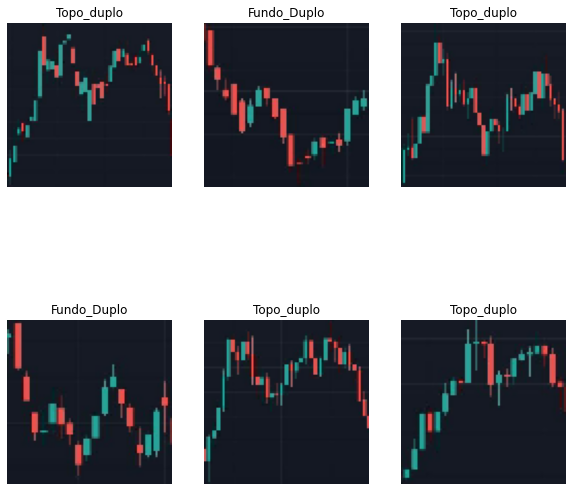

In [10]:
plot_dataset(dataset_test)

### Construindo a arquitetura

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(scale = 1./image_color_channel_size),
  tf.keras.layers.Reshape(target_shape= (80,80,3), input_shape = image_shape ),
  tf.keras.layers.Conv2D(16,3,padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(32,3,padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(64,3,padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 80, 80, 3)         0         
                                                                 
 reshape (Reshape)           (None, 80, 80, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 78, 78, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                    

### Treinando o Modelo

In [13]:
history = model.fit(
    dataset_train,
    validation_data = dataset_test,
    epochs = epochs
)

Epoch 1/10
13/13 [==============================] - 3s 129ms/step - loss: 0.6362 - accuracy: 0.6487 - val_loss: 0.5187 - val_accuracy: 0.7273
Epoch 2/10
13/13 [==============================] - 1s 90ms/step - loss: 0.5019 - accuracy: 0.7103 - val_loss: 0.3761 - val_accuracy: 0.8364
Epoch 3/10
13/13 [==============================] - 1s 89ms/step - loss: 0.3626 - accuracy: 0.8821 - val_loss: 0.2238 - val_accuracy: 0.9818
Epoch 4/10
13/13 [==============================] - 1s 90ms/step - loss: 0.2354 - accuracy: 0.9436 - val_loss: 0.1175 - val_accuracy: 0.9818
Epoch 5/10
13/13 [==============================] - 1s 97ms/step - loss: 0.1367 - accuracy: 0.9718 - val_loss: 0.0696 - val_accuracy: 0.9636
Epoch 6/10
13/13 [==============================] - 1s 94ms/step - loss: 0.0954 - accuracy: 0.9821 - val_loss: 0.0541 - val_accuracy: 0.9818
Epoch 7/10
13/13 [==============================] - 1s 95ms/step - loss: 0.0629 - accuracy: 0.9821 - val_loss: 0.0509 - val_accuracy: 0.9818
Epoch 8/10
1

### Avaliando o Modelo

In [15]:
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

2/2 [==============================] - 0s 20ms/step - loss: 0.0511 - accuracy: 0.9636
Dataset Test Loss:     0.05109623074531555
Dataset Test Accuracy: 0.9636363387107849


In [16]:
def plot_model():
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs_range = range(epochs)

  plt.gcf().clear()
  plt.figure(figsize = (15, 8))

  plt.subplot(1, 2, 1)
  plt.title('Training and Validation Accuracy')
  plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
  plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
  plt.legend(loc = 'lower right')

  plt.subplot(1, 2, 2)
  plt.title('Training and Validation Loss')
  plt.plot(epochs_range, loss, label = 'Training Loss')
  plt.plot(epochs_range, val_loss, label = 'Validation Loss')
  plt.legend(loc = 'lower right')

  plt.show()


<Figure size 432x288 with 0 Axes>

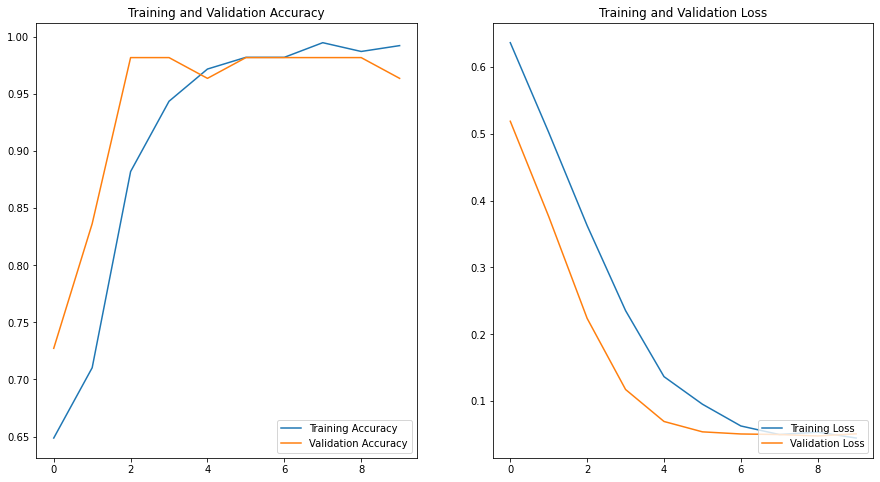

In [17]:
plot_model()

### Testando o Modelo

In [18]:
def plot_dataset_predictions(dataset):
  features, labels = dataset.as_numpy_iterator().next()

  predictions = model.predict_on_batch(features).flatten()
  predictions = tf.where(predictions < 0.5, 0, 1)

  print('Labels:  %s' % labels)
  print('Predictions: %s' % predictions.numpy())

  plt.gcf().clear()
  plt.figure(figsize=(20,20))

  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.axis('off')
    plt.imshow(features[i].astype('uint8'))
    plt.title(class_names[predictions[i]])

Labels:  [0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1]
Predictions: [0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1]


<Figure size 432x288 with 0 Axes>

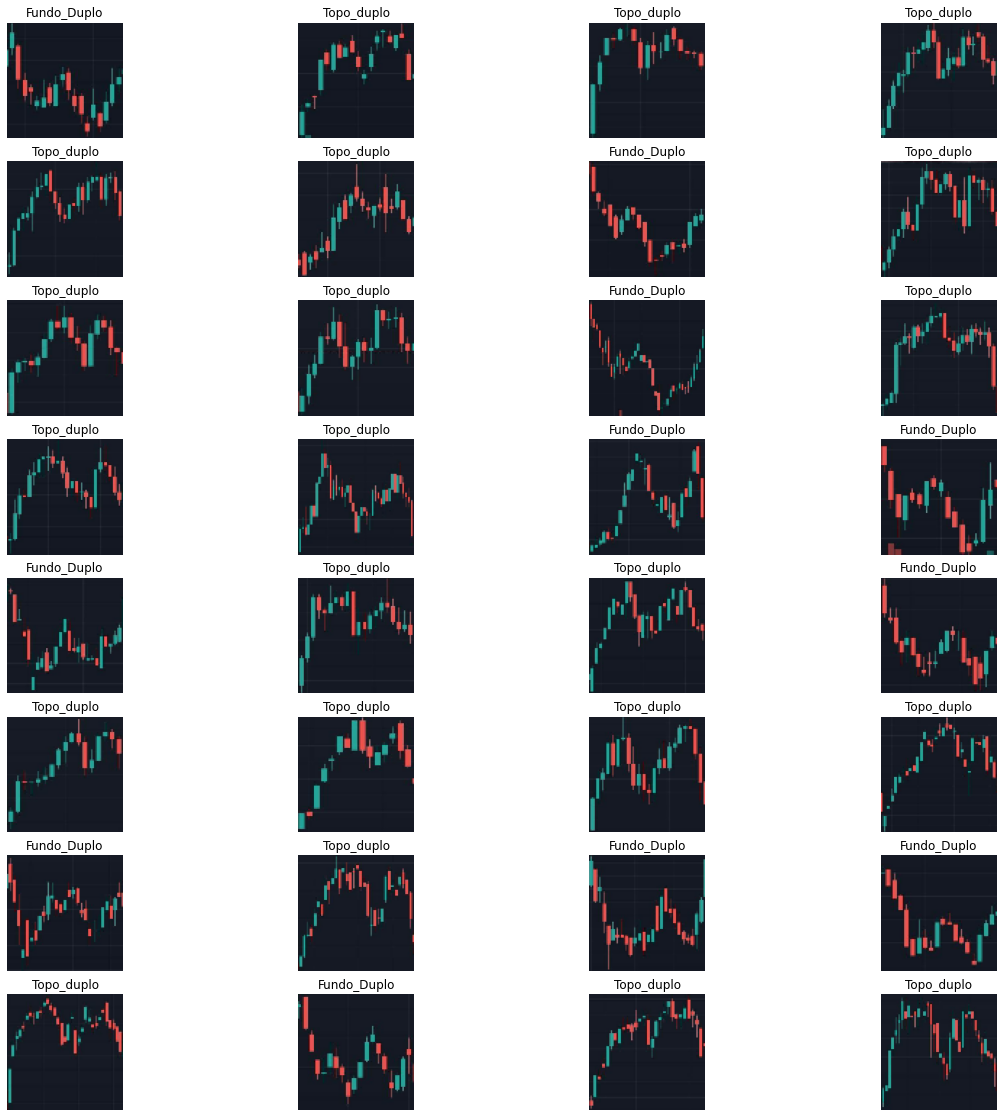

In [19]:
plot_dataset_predictions(dataset_test)

In [20]:
def predict(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = image_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)

    prediction = model.predict(image)[0][0]

    print('Prediction: {0} | {1}'.format(prediction, ('Fundo_Duplo' if prediction < 0.5 else 'Top_Duplo')))

def predict_url(image_fname, image_origin):

    image_file = tf.keras.utils.get_file(image_fname, origin = image_origin)
    return predict(image_file)